In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import StratifiedShuffleSplit

from modules.neural_networks import BayesianMLP

import pymc3 as pm

from modules.viz_utils import visulize_bernoulli_post, visulize_categorical_post

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Binary - Breast Cancer 

In [55]:
X, y = load_breast_cancer(
    return_X_y=True
)

for tr_i, ts_i in StratifiedShuffleSplit(n_splits=1).split(X, y):
    
    X_tr, X_ts = X[tr_i], X[ts_i]
    y_tr, y_ts = y[tr_i], y[ts_i]
    
    scaler = MinMaxScaler()
    scaler.fit(X_tr)
    X_tr = scaler.transform(X_tr)
    X_ts = scaler.transform(X_ts)

C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\pymc3\data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


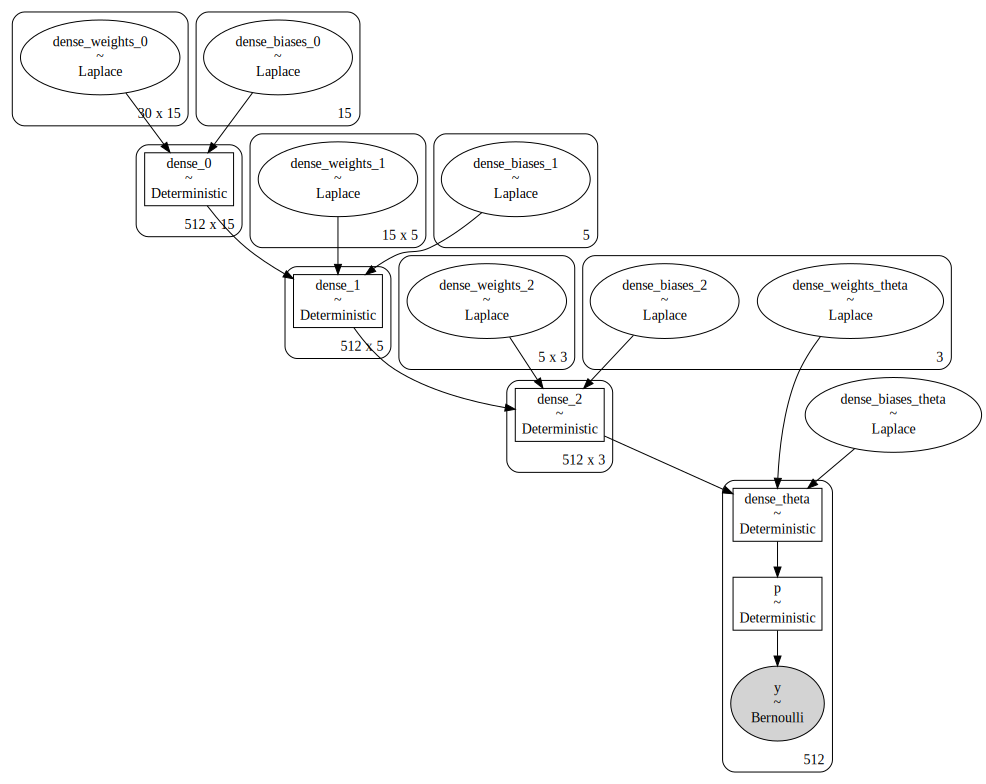

In [62]:
bernoulli_perceptron = BayesianMLP(
    X=X_tr, 
    y=y_tr, 
    shape_out=1, 
    likelyhood_model='bernoulli_lk',
    prior=pm.Laplace,
    layers=(15, 5, 3), 
    activation='tanh',
    mu=0.,
    b=1.
)
bernoulli_perceptron.show_graph()

In [63]:
bernoulli_perceptron.fit(n=500000)
bernoulli_traces = bernoulli_perceptron.predict(
    X_ts, 
    y_ts, 
    ['p'], 
    samples=3000
)

Finished [100%]: Average Loss = 11.733


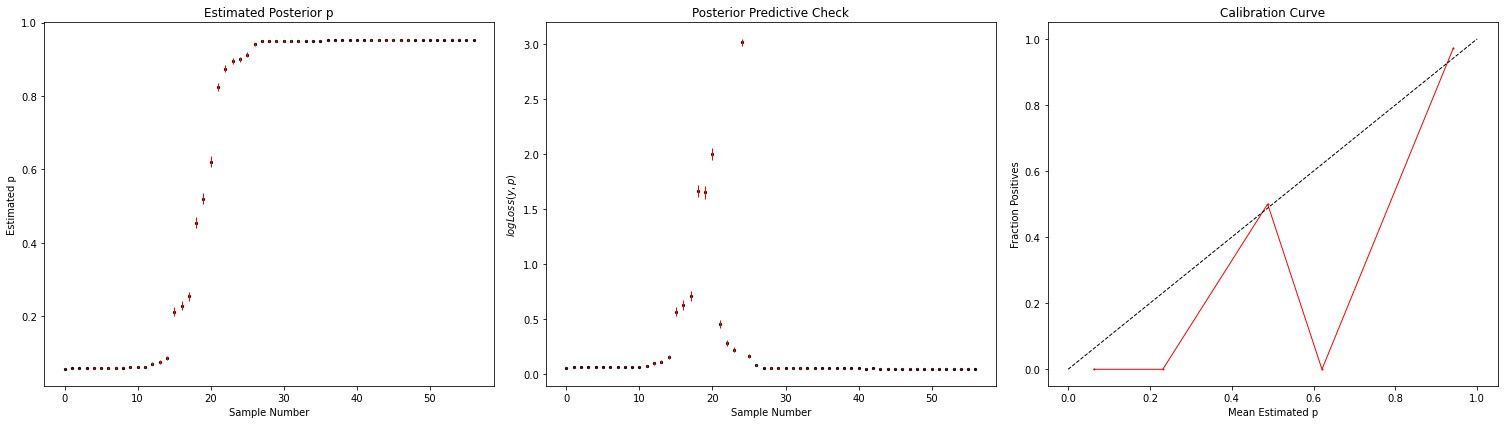

In [64]:
visulize_bernoulli_post(
    traces=bernoulli_traces, 
    y=y_ts
)

# Multiclass - MNIST

In [65]:
X, y = load_digits(return_X_y=True)

for tr_i, ts_i in StratifiedShuffleSplit(n_splits=1).split(X, y):
    
    X_tr, X_ts = X[tr_i], X[ts_i]
    y_tr, y_ts = y[tr_i], y[ts_i]

    scaler = MinMaxScaler()
    scaler.fit(X_tr)

    X_tr = scaler.transform(X_tr)
    X_ts = scaler.transform(X_ts)

C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\pymc3\data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


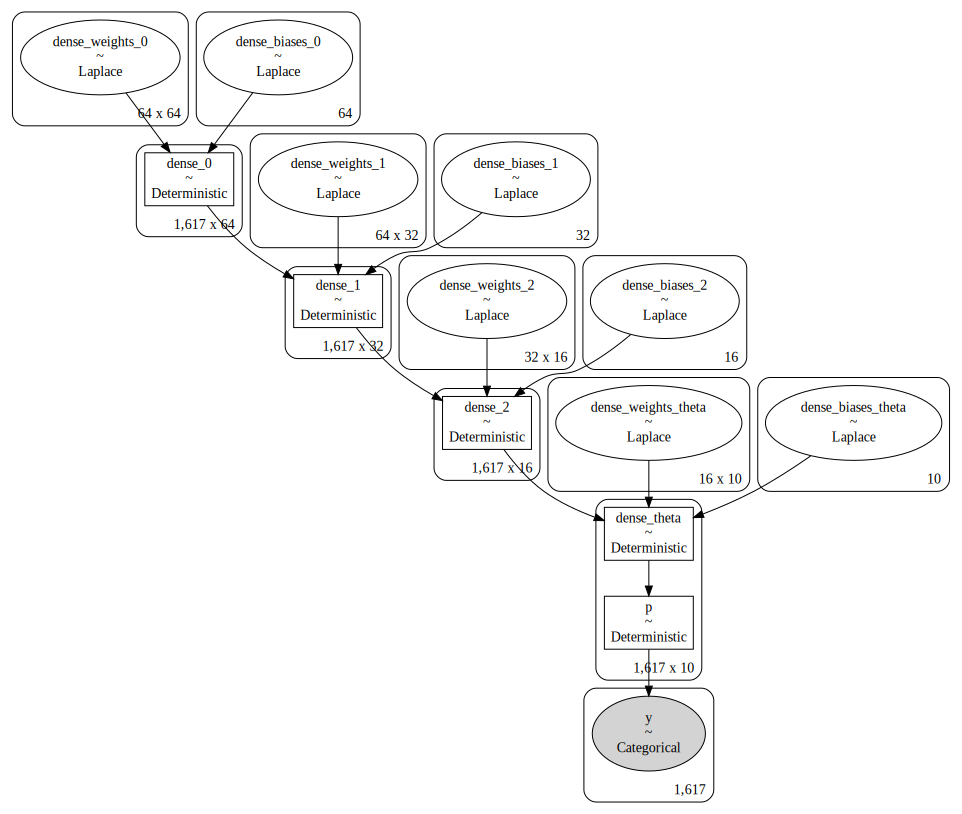

In [66]:
categorical_perceptron = BayesianMLP(
    X=X_tr, 
    y=y_tr, 
    shape_out=10, 
    likelyhood_model='categorical_lk',
    layers=(64, 32, 16), 
    activation='tanh',
    prior=pm.Laplace,
    mu=0.,
    b=1.,
    batch_size=64
)
categorical_perceptron.show_graph()

In [67]:
categorical_perceptron.fit(n=100000)
categorical_traces = categorical_perceptron.predict(
    X_ts, 
    y_ts,
    ['p'],
    samples=3000
)

Finished [100%]: Average Loss = 129.43


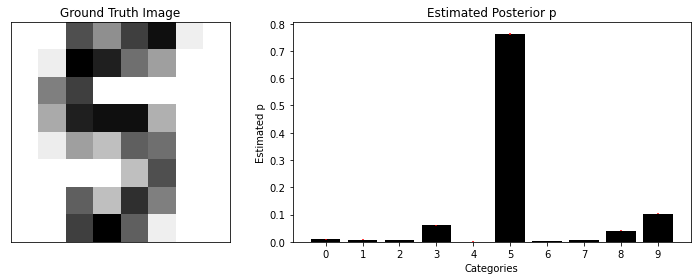

In [71]:
visulize_categorical_post(
    X=X_ts, 
    p=categorical_traces['p'],
    index=83
)